In [7]:
from signalTeste import *
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
#import wave
import time
import pickle
import peakutils
%matplotlib inline 

In [8]:
sig = signalMeu()
fs = 48000
sd.default.samplerate = fs
sd.default.channels = 1

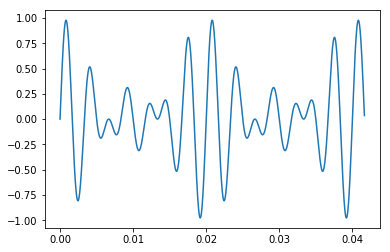

In [9]:
#Ex. De geração de sinal
#sig.generateSin(frequency, amplitude, duration)

time, sinal = sig.generateSin(350,1,2,fs)
time, sinal1 = sig.generateSin(250,1,2,fs)
time, sinal2 = sig.generateSin(300,1,2,fs)
sinalF = np.add(sinal, sinal1)
sinalF = np.add(sinalF, sinal2)/3
#sd.playrec(inputArray, samplingFrequency, channels)
sd.playrec(sinalF, fs, channels=1)
plt.plot(time[:2000], sinalF[:2000])
plt.show()

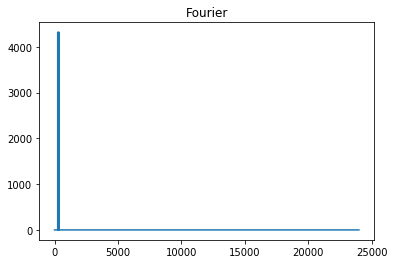

In [10]:
#
sig.plotFFT(sinalF[:48000],fs)

In [11]:
#Helper Function to generate the signal as a telephone
def geraNum(number, amplitude=1, duration = 1, fs=48000):
    listaFreq = [[941,1336], [697,1209],
                 [697,1336], [697,1477],
                 [770,1209], [770,1336],
                 [770,1477], [852,1209],
                 [852,1336], [852,1477] ]
    #print(listaFreq[number])
    time, sinal = sig.generateSin(listaFreq[number][0],amplitude,duration,fs)
    time, sinal1 = sig.generateSin(listaFreq[number][1],amplitude,duration,fs)
    sinalF = np.add(sinal, sinal1)/2
    
    return time,sinalF

In [12]:
#Recebe uma string de números (número de celular, por examplo) e junta pra fazer o dial
def geraSeq(numero, pressTime = 0.25, intervalTime = 0.05, fs=48000):
    delay = np.zeros(int(intervalTime*fs))
    finalSignal = []
    for digit in range(len(numero)-1):
        tempo, signal = geraNum(int(numero[digit]), duration=pressTime)
        finalSignal.append(signal)
        finalSignal.append(delay)
    tempo, signal = geraNum(int(numero[-1]), duration=pressTime)
    finalSignal.append(signal)
    finalSignal = np.concatenate(finalSignal)
    
    return finalSignal


finalSignal = geraSeq("946337814")
myrecording = sd.playrec(finalSignal, fs, channels=1)
#plt.plot(tempo[:500], sinalao[:500])
#plt.show()

In [13]:
finalSignal = geraSeq("1")
myrecording = sd.playrec(finalSignal, fs, channels=1)

In [14]:
tempo, sinalao = geraNum(number=1, duration=2)
myrecording = sd.playrec(sinalao, fs, channels=1)
#sinalao = np.concatenate([sinalao,sinalF])

In [19]:
duration = 5
myrecording = sd.rec(int(duration * fs))
sd.wait()

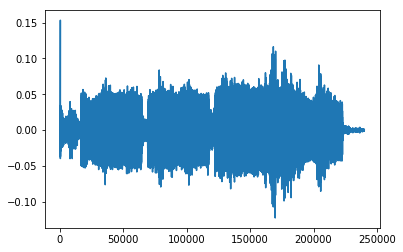

In [20]:
plt.plot(myrecording)
plt.show()

[ 697 1209]


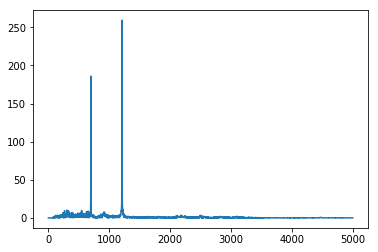

[ 698 1336]


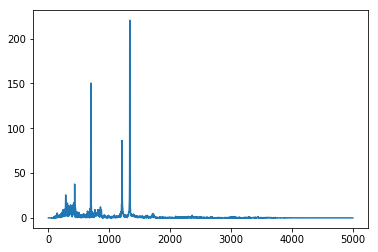

[ 698 1336 1477]


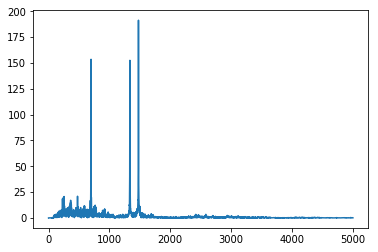

[ 697 1477]


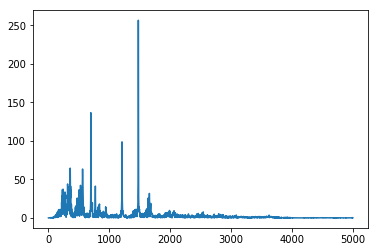

[1209]


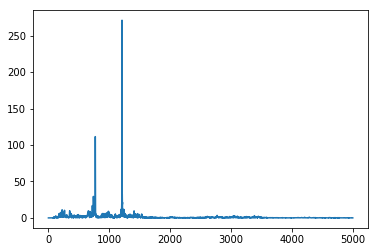

In [21]:
x = 0
fs = 48000
while True:
    if(x > 4*fs):
        break
    cache = myrecording[x:x+fs,0]
    frequencias,FFArray = sig.calcFFT(cache, fs)
    frequencias = frequencias[:5000]
    FFArray = FFArray[:5000]
    indexes = peakutils.indexes(FFArray, thres=0.5, min_dist=60)
    print(indexes)
    plt.plot(frequencias,FFArray)
    plt.show()
    x += fs
    

12
